<a href="https://colab.research.google.com/github/docheem/NLP-Portfolio/blob/main/PR_NLP_Text_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In thia first session of our project, we will:
- Calculate summary statistics
- Check for missing value
- Plot distributions of interesting attributes
- Comapare distributions across categories
- Visualize developments overtime

In [ ]:
import sys, os

ON_COLAB = 'google.colab' in sys.modules

if ON_COLAB:
    GIT_ROOT = 'https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master'
    os.system(f'wget {GIT_ROOT}/ch01/setup.py')

%run -i setup.py

You are working on Google Colab.
Files will be downloaded to "/content".
!wget -P /content https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/settings.py
!wget -P /content/data/un-general-debates https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/data/un-general-debates/un-general-debates-blueprint.csv.gz
!wget -P /content/ch01 https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/ch01/requirements.txt

Additional setup ...
!pip install -r ch01/requirements.txt


## Load Python Settings<div class="tocSkip"/>

Common imports, defaults for formatting in Matplotlib, Pandas etc.

In [ ]:
%run "$BASE_DIR/settings.py"

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'png'

# Exploratory Data Analysis


In [ ]:
pd.options.display.max_colwidth = 150 ###

file = "un-general-debates-blueprint.csv"

file = f"{BASE_DIR}/data/un-general-debates/un-general-debates-blueprint.csv.gz" ### real location


In [ ]:
# Reading the cvs file

my_df = pd.read_csv(file)

In [ ]:

my_df.head(2)

# my_df.sample()

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the congratulations of the Albanian delegation on his election to the Presidency of the twenty-fifth sessi...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,"177.\t : It is a fortunate coincidence that precisely at a time when the United Nations is celebrating its first twenty-five years of existence, a..."


In [ ]:
my_df.info()
#my_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


In [ ]:
my_df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')

In [ ]:
# Checking the size of the data.

my_df.shape

(7507, 7)

Our data have 7507 rows and 7 columns.

#summary statistics

In [ ]:
# Currently, our DataFrame contains only the session number and the year as numerical data.
# Let’s add a new numerical column to the DataFrame containing the text length
# to get some additional information about the distribution of the lengths of the speeches
#
#
my_df['length'] = my_df['text'].str.len()

my_df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.00,49.61,12.89,25.00,39.00,51.00,61.00,70.00
year,7507.00,1994.61,12.89,1970.00,1984.00,1996.00,2006.00,2015.00
length,7507.00,17967.28,7860.04,2362.00,12077.00,16424.00,22479.50,72041.00


In [ ]:
# Lets get the count, the number of unique values,
# the top-most element (or one of them if there are
# many with the same number of occurrences),
# and its frequency. As the number of unique values
# is not useful for textual data, let’s just analyze
# the country and speaker columns

my_df[['country', 'speaker']].describe(include= None).T



,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


Th Dataset have:
- 199 unique countries
- 5,428 speakers


# Checking Data for missing value

In [ ]:
# Checking Data for missing value

my_df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

The spoeaker column and the position have missing value and we have to be very careful.

In [ ]:
# Substitutes for missing value with generic value such as unknown speaker
# or positions or maybe empty strings. Even the existed value can be a problem
# because sometimes the speakers name are spelled different

my_df['speaker'].fillna('unknown', inplace = True)



In [ ]:
# let us computes the number of records per speaker for all documents
# containing a speaker name in the speaker column.

my_df[my_df['speaker'].str.contains('Bush')]['speaker'].value_counts()



George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: speaker, dtype: int64

We cannot do any analysis on the speakers because their names are spelled different. Any analysis will not produce a good result. We will come back to the column speaker.

#Plotting value distribution.

- Visualizing the distribution of speech lengths for selected countries.


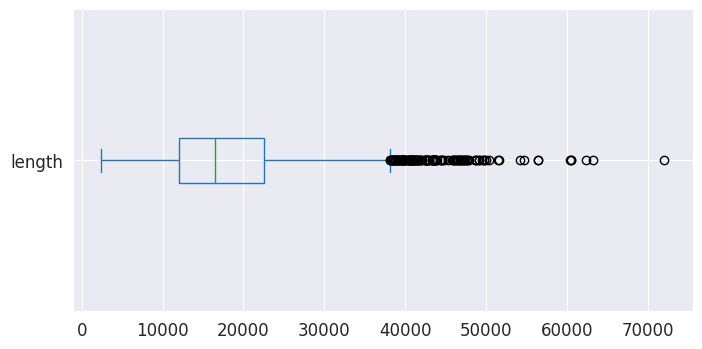

In [ ]:
# plotting our 5 number summary

my_df['length'].plot(kind ='box', vert = False)

we have so many outliers to the right, our distribution is skewed to the left. We can plot an histogram to get more informations.

Text(0.5, 0, '')

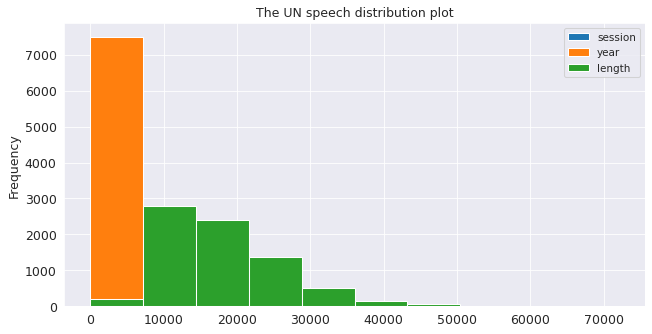

In [ ]:
fig , ax = plt.subplots(figsize = [10, 5], dpi = 75)

my_df.plot(kind = 'hist', ax = ax)

ax.set_title('The UN speech distribution plot')
ax.set_xlabel('')

#Comparing the distributions across categories

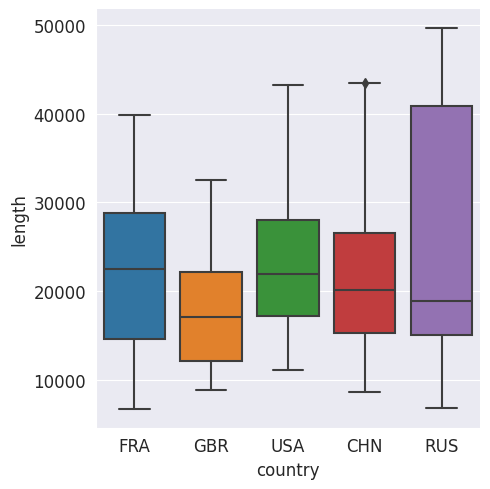

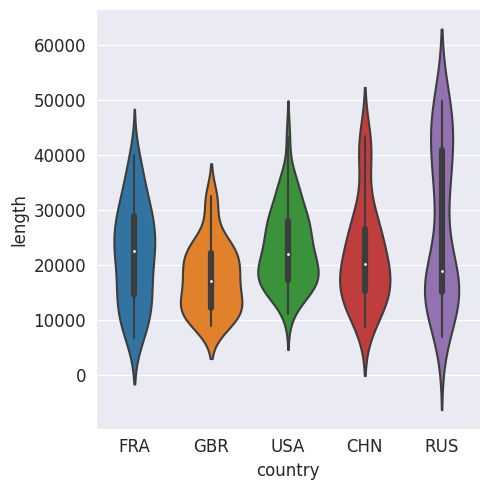

In [ ]:
# Seaborn catplot will allow us to visualize the distribution
# across different categories in order to do comaparisons.


import seaborn as sns

where = my_df['country'].isin(['USA',
                               'FRA',
                               'GBR',
                               'CHN',
                               'RUS'])

sns.catplot(data = my_df[where],
            x = 'country',
            y = 'length',
            kind = 'box')

sns.catplot(data = my_df[where],
            x = 'country',
            y = 'length',
            kind = 'violin')


Note, The violin plot is the “smoothed” version of a box plot.
The width of the violin body shows visualization of frequency, while the box plot is still inside the violin. Both plot reveals the dispersions/scattering of values. In this dataset, Russia length speeches is much larger than Great Britain. Remember, The things that are different in the data, only becomes visisble when different subsets of the data are examined.

#Visualizing Developments Over Time

when the data have dates and time attributes, it s always great to visualize some development within the data over time

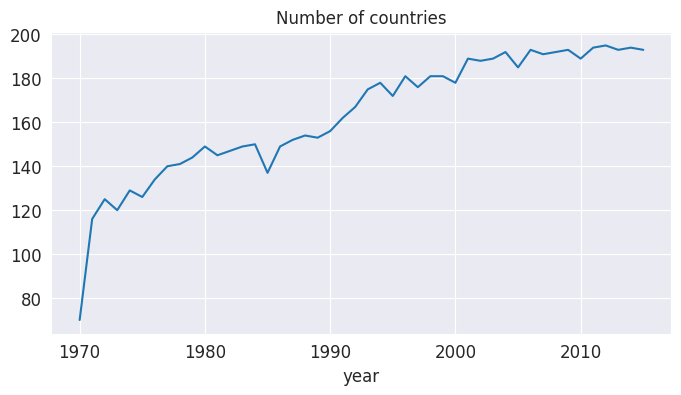

In [ ]:
my_df.groupby('year').size().plot(title = 'Number of countries')

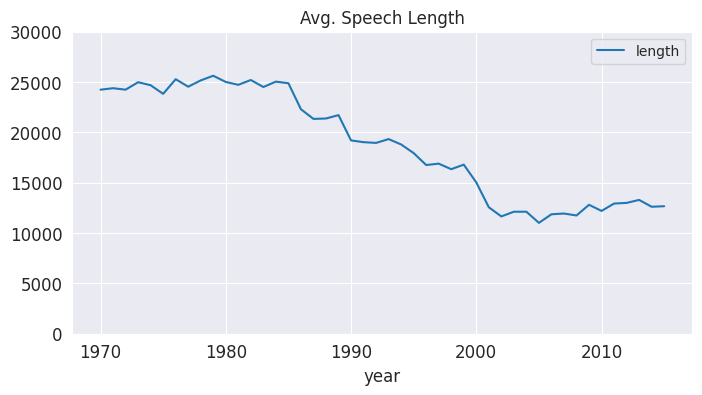

In [ ]:
my_df.groupby('year').agg({'length': 'mean'}).plot(title="Avg. Speech Length", ylim=(0,30000))


Baed on the results, the more countries that participated, the shorter the length of speech becomes.

#Building a simple text processing pipeline


we will develop a basic blueprint to prepare text for a
quick first analysis consisting of a simple sequence of steps. As the output of one operation forms the input of the next one, such a sequence is also called a
processing pipeline that transforms the original text into a number of tokens.

Our pipeline consist of three steps: Case-folding into lowercase, tokenization, and stop word removal.

we build our own tokenizer based on regular expressions and show how to use an arbitrary stop word list.

In [ ]:
# Tokenization is the process of extracting words from a sequence of characters.
# we want to apply a simple pattern that matches words.
# Remember, Words in our definition consist of at least one letter as well as digits and hyphens.
#
#
# insead of using the expression [A-Za-z] we will use the POSIX character class \p{L},
# which selects all Unicode letters
#
# why?
#
# [A-Za-z] is not a good option for matching letters
# because it misses accented letters like ä or â.


import regex as re

In [ ]:
# The expression below matches tokens consisting of at least one letter (\p{L}),
# preceded and followed by an arbitrary sequence of
# alphanumeric characters (\w includes digits, letters, and underscore)
# and hyphens (-):

def tokenize(text):

  return re.findall(r'[\w-]*\p{L}[\w-]*', text)


In [ ]:
text = """NLP is the best field in the data science
world! let's use it to defeat SARS-CoV-2 together in 2020!"""

tokens = tokenize(text)

In [ ]:
print('|'.join(tokens))

NLP|is|the|best|field|in|the|data|science|world|let|s|use|it|to|defeat|SARS-CoV-2|together|in


#Treating Stop Word

These words called stop words, are common and frequent in text. They are determiners, auxiliary, verbs, pronouns, adverbs, and so on. stop words usually don’t carry much information but hide interesting content because of their
high frequencies. Therefore, stop words are often removed before data analysis or model training.

Common stop word lists are available for many languages and are integrated in almost any NLP library. We will work with NLTK’s list of stop words

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import WordListCorpusReader
nltk.download('wordnet')
nltk.download('words')
nltk.download('stopwords')

#nltk.download('all')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Common stop word lists are available for many languages and are integrated in
# almost any NLP library.

#Appraoch 1

import pandas as pd

my_stopWords = set(nltk.corpus.stopwords.words('english'))
pd.DataFrame(my_stopWords)

#Appraoch 2

# my_stopWords_2 = set(stopwords.words('english'))
# my_stopWords_2

,0
0,at
1,needn
2,hers
3,into
4,after
...,...
174,ll
175,having
176,it
177,shan


In [ ]:
# Note: Be aware, Removing stop words can significantly affect
# the performance of semantically targeted analyses.

def remove_stop(tokens):

  return [t for t
          in tokens
          if t.lower()
          not in my_stopWords]

In [ ]:
# Sometimes you'll need to add domain-sprecific stop words to the predefined list.
# A good example is, if you're running data analysis on emails, the terms dear, regards
# and other words most likely will appear on almost any document or corpus.
# On the other hand, you may not want to treat these words as stop words We can add additional stop words and
# exclude others from the list by using two of Python’s set operators, | (union/or) and - (difference).




#define stopwords
# include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
# exclude_stopwords = {'against'}


In [ ]:
# create a new set with only the included stopwords

# include_set = set(include_stopwords)

# xclude_set = set(exclude_stopwords)

In [ ]:
# Create a union of included and excluded stopwords
# stopwords = include_stopwords.union(exclude_stopwords)

# Processing a Pipeline with one line of code

create a new column called tokens containing the lowercased, tokenized text without stop words for each document

In [ ]:
# Change all text to lowercase,
# tokenize it,
# and remove stop words

pipeline = [str.lower,
            tokenize,
            remove_stop]

In [ ]:
def prepare(text, pipeline):


  tokens = text

  for transform in pipeline:
      tokens = transform(tokens)

  return tokens

In [ ]:
my_df['tokens'] = my_df['text'].apply(prepare,
                                      pipeline = pipeline)

In [ ]:
# The tokens column now consists of Python lists containing the extracted tokens for each document

pd.DataFrame(my_df['tokens'].head())

# we can do
# my_df['tokens'].sample(2)

,tokens
0,"[may, first, convey, president, congratulations, albanian, delegation, election, presidency, twenty-fifth, session, general, assembly, taking, wor..."
1,"[fortunate, coincidence, precisely, time, united, nations, celebrating, first, twenty-five, years, existence, eminent, jurist, closely, linked, or..."
2,"[pleasure, extend, mr, president, warmest, congratulations, australia, government, delegation, general, assembly, election, presidency, distinguis..."
3,"[may, begin, expressing, ambassador, hambro, behalf, delegation, austria, best, wishes, election, president, general, assembly, derive, great, sat..."
4,"[doubt, us, coming, rostrum, wonders, usefulness, futility, speech, must, still, speak, voices, drowned, mournful, cries, many, victims, world, di..."


#Word Frequency Analysis

Word frequency is when the words are
thrown into a bag where they tumble into a jumble.
- The order and context of the words are ignored
- original arrangment of the text is lost.
- Only the frequency of the terms is taking into account.

This model works well for classification and topic modeling.

In [ ]:
my_df['num_tokens'] = my_df['tokens'].map(len)

In [ ]:
# Counting Words with a Counter
# Counter is a built-in library in python that count things


from collections import Counter

In [ ]:
# Example

my_tokens = tokenize("I am glad I learned NLP, I know the future ahead looks bright")
my_counter = Counter(my_tokens)

my_counter



Counter({'I': 3,
         'am': 1,
         'glad': 1,
         'learned': 1,
         'NLP': 1,
         'know': 1,
         'the': 1,
         'future': 1,
         'ahead': 1,
         'looks': 1,
         'bright': 1})

the letter 'I' have the most frequencies, it appears 3 times

In [ ]:
# Now we will find the most frequent words within our corpus
# we need to create a counter from the list of all
# words in all documents.

corpus_counter = Counter()

my_df['tokens'].map(corpus_counter.update)


print(pd.DataFrame(corpus_counter.most_common(5)))

               0       1
0        nations  124508
1         united  120763
2  international  117223
3          world   89421
4      countries   85734


In [ ]:
def count_words(my_df,
                column = 'tokens',
                preprocess = None,
                min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    my_df[column].progress_map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_token = freq_df.query('freq >= @min_freq')
    freq_token.index.name = 'token'

    return freq_token.sort_values('freq', ascending=False)

In [ ]:
myfreq_df = count_words(my_df).reset_index()
myfreq_df

  0%|          | 0/7507 [00:00<?, ?it/s]

,token,freq
0,nations,124508
1,united,120763
2,international,117223
3,world,89421
4,countries,85734
...,...,...
40507,zealousness,2
40508,cancels,2
40509,quasi-unanimous,2
40510,swindle,2


In [ ]:
count_words(my_df,
            column='text',
            preprocess = lambda text:
            re.findall(r"\w{10,}", text)).reset_index()

  0%|          | 0/7507 [00:00<?, ?it/s]

,token,freq
0,international,106974
1,development,51334
2,Government,35528
3,Organization,33763
4,developing,25177
...,...,...
11231,enfranchising,2
11232,interrelate,2
11233,compositions,2
11234,extensiveness,2


[Text(0, 0.5, 'Token'), Text(0.5, 0, 'Frequency'), Text(0.5, 1.0, 'Top Words')]

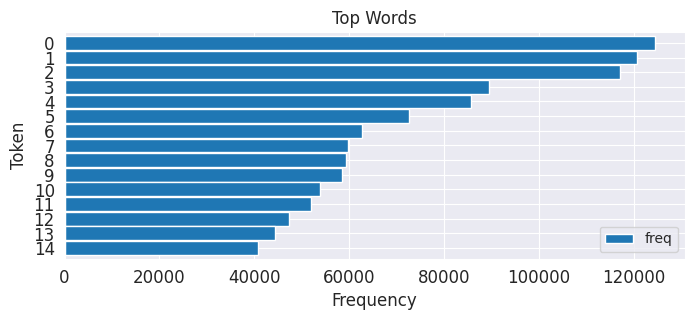

In [ ]:
ax = myfreq_df.head(15).plot(kind='barh',
                    width=0.95,
                    figsize=(8,3))
ax.invert_yaxis()

ax.set(xlabel='Frequency',
       ylabel='Token',
       title='Top Words')

#Creating Word Clouds

Word clouds, in contrast, visualize the frequencies by different font sizes. They are much easier to comprehend and to compare, but they lack the precision of tables and bar charts. You should keep in mind that long words or words with capital letters get unproportionally high attraction.

In [ ]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

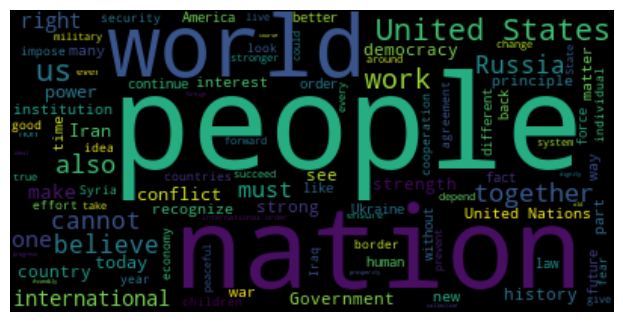

In [ ]:
# Access the list of stopwords contained within
# the WordListCorpusReader object using the words() method
# The following code shows how to generate a word cloud for
# the text of the 2015 US speech and display the resulting image with Matplotlib

stopwords = stopwords.words()
wc = WordCloud(max_words=100, stopwords=my_stopWords)
text = my_df.query("year==2015 and country=='USA'")['text'].values[0]
wc.generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")


In [ ]:
def wordcloud(word_freq,
              title = None,
              max_words = 200,
              stopwords = None):

    wc = WordCloud(width = 800,
                   height = 400,
                   background_color = "black",
                   colormap = "Paired",
                   max_font_size = 150,
                   max_words = max_words)

    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items()
                              if token not in stopwords}

    wc.generate_from_frequencies(counter)

    plt.title(title)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

  0%|          | 0/193 [00:00<?, ?it/s]

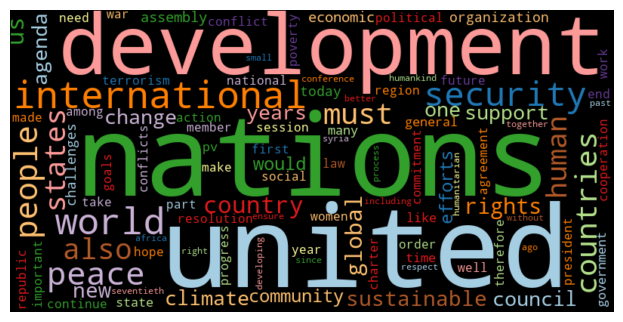

In [ ]:
freq_2015_df = count_words(my_df[my_df['year'] == 2015])

plt.figure(figsize = (12,4))

wordcloud(freq_2015_df['freq'],
          max_words = 100)

wordcloud(freq_2015_df['freq'],
          max_words = 100,
          stopwords = myfreq_df.head(50).index)

  0%|          | 0/193 [00:00<?, ?it/s]

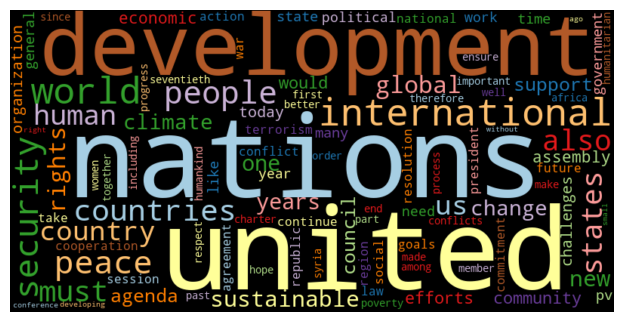

In [ ]:

freq_2015_df = count_words(my_df[my_df['year']==2015])

plt.figure(figsize = (12,4))

wordcloud(freq_2015_df['freq'],
          max_words = 100)

wordcloud(freq_2015_df['freq'],
          max_words = 100,
          stopwords = myfreq_df.index)

#Inverse Document Frequency
The inverse document frequency (IDF) is a weighting factor that measures the “unusualness” of a term in a corpus. It is often used to reduce the influence of common terms for data analysis or machine learning.

In [ ]:
import numpy as np


def idf(my_df,
        column = 'tokens',
        preprocess = None,
        min_df = 2):

    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    # count tokens
    counter = Counter()
    my_df[column].progress_map(update)

    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter,
                                    orient = 'index',
                                    columns = ['my_df'])

    idf_df = idf_df[idf_df['my_df'] >= min_df]

    idf_df['idf'] = np.log(len(my_df)/idf_df['my_df'])+0.1


    idf_df.index.name = 'token'
    return idf_df

In [ ]:
idf_df = idf(my_df).reset_index()
idf_df


  0%|          | 0/7507 [00:00<?, ?it/s]

,token,my_df,idf
0,treaty,3152,0.97
1,rest,1677,1.60
2,essential,3478,0.87
3,policeman,41,5.31
4,higher,959,2.16
...,...,...,...
39372,tatars,3,7.92
39373,decarbonization,2,8.33
39374,fit-for-purpose,2,8.33
39375,shamin,2,8.33


In [ ]:
myjoin_df = myfreq_df.join(idf_df,
               lsuffix='_left',
               rsuffix='_right')


myjoin_df['tfidf'] = myjoin_df['freq'] * myjoin_df['idf']

In [ ]:
freq_1970 = count_words(my_df[my_df['year'] == 1970])
freq_2015 = count_words(my_df[my_df['year'] == 2015])

freq_1970['tfidf'] = freq_1970['freq'] * idf_df['idf']
freq_2015['tfidf'] = freq_2015['freq'] * idf_df['idf']


  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

In [ ]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [ ]:
wordcloud(myjoin_df['freq'], title='All years', subplot=(1,3,1))


TypeError: ignored

In [ ]:
wordcloud(freq_1970['freq'],
          title='1970 - TF',
          stopwords = ['twenty-fifth',
                       'twenty-five'])


In [ ]:
wordcloud(freq_2015['freq'],
          title = '2015 - TF',
          stopwords = ['seventieth'])



In [ ]:
wordcloud(freq_1970['tfidf'],
          title='1970 - TF-IDF',
          stopwords=['twenty-fifth',
                     'twenty-five',
                     'twenty',
                     'fifth'])




In [ ]:
wordcloud(freq_2015['tfidf'],
          title='2015 - TF-IDF',
          stopwords = ['seventieth'])